<a href="https://colab.research.google.com/github/fillipesansilva/Livraria/blob/master/exe2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1945]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1946]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics  import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

In [1947]:
#dataset from https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/notebooks
'''Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
'''

dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/semana2/heart_failure_clinical_records_dataset.csv")
dados = dados.dropna()
print(dados.head())

    age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]


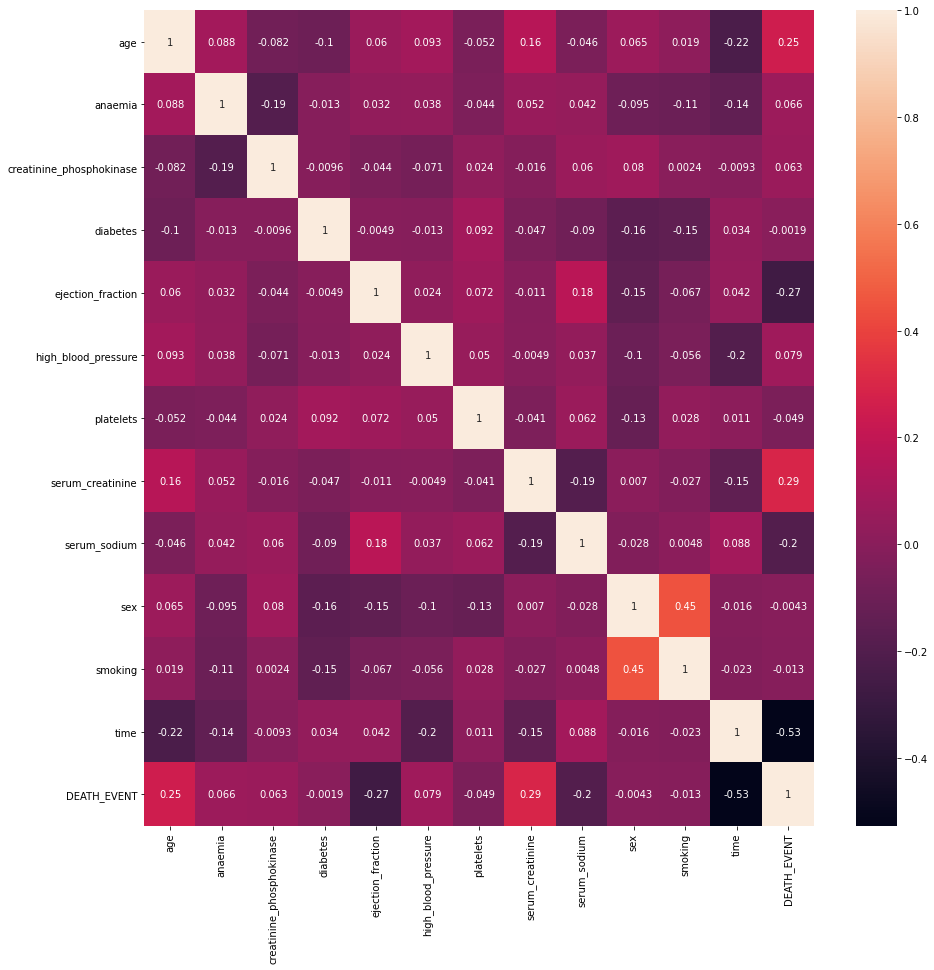

In [1948]:
#continuous variable analysis with respect to target variable
plt.figure(figsize=(15,15))
sns.heatmap(dados.corr(),annot=True)

**Normalização**

{'boxes': [<matplotlib.lines.Line2D at 0x7f7302bb4908>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7302bcb358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7302bcbdd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7302bcba58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7302bb4c18>,
  <matplotlib.lines.Line2D at 0x7f7302bb4f98>]}

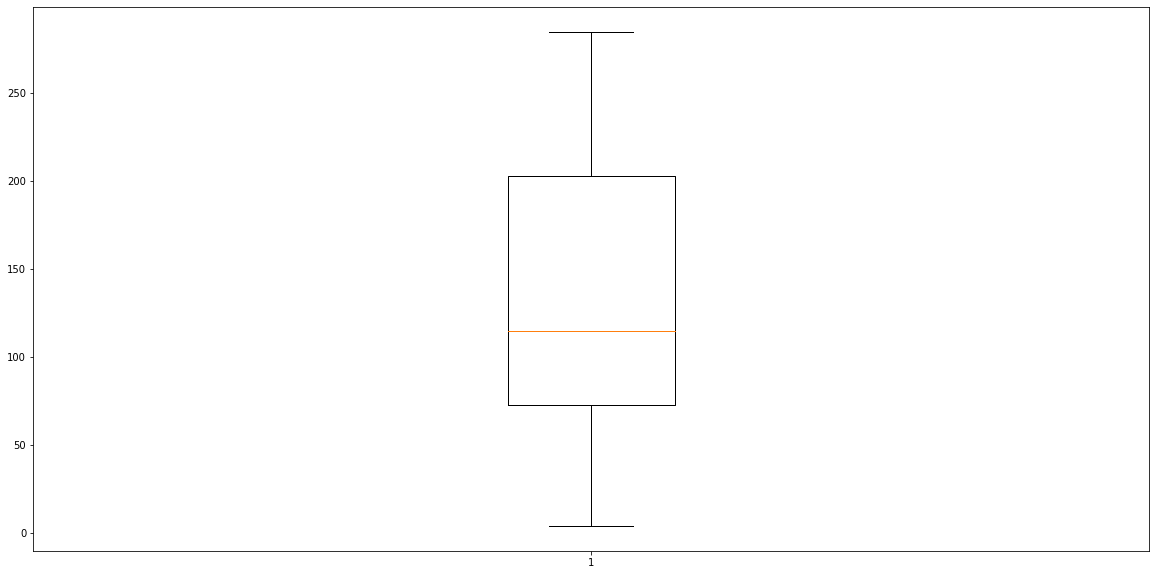

In [1949]:
plt.boxplot(dados['time'])

Sem outliers em dados["time"]

{'boxes': [<matplotlib.lines.Line2D at 0x7f7302ba9f98>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7302b379e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7302b414a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7302b41128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7302b372e8>,
  <matplotlib.lines.Line2D at 0x7f7302b37668>]}

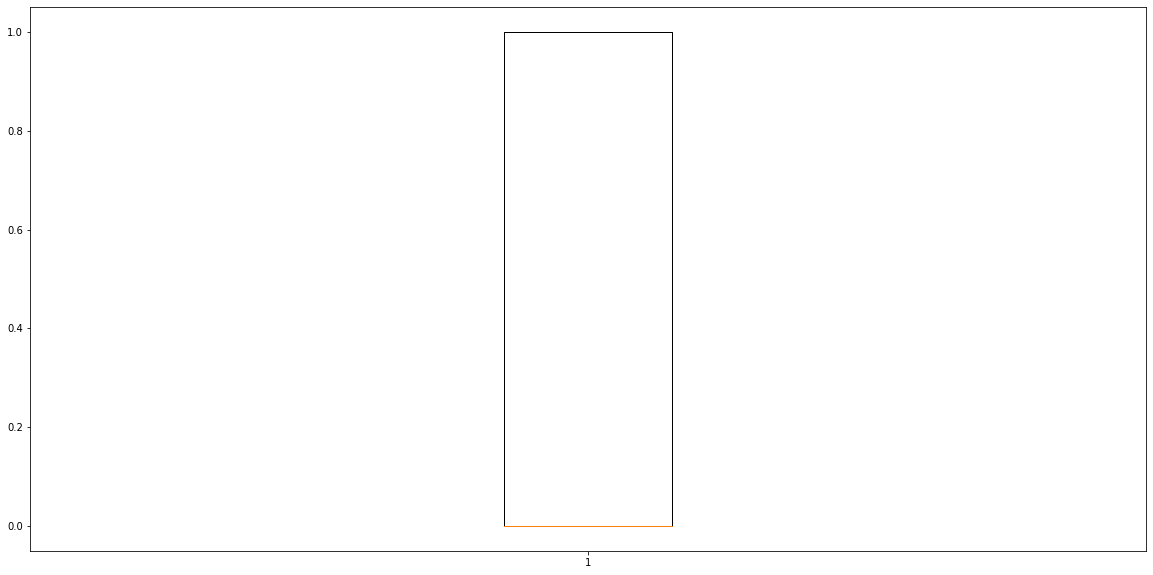

In [1950]:
plt.boxplot(dados['high_blood_pressure'])

Sem outliers em dados["high_blood_pressure"]

{'boxes': [<matplotlib.lines.Line2D at 0x7f7302b0c8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7302b1a320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7302b1ada0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7302b1aa20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7302b0cbe0>,
  <matplotlib.lines.Line2D at 0x7f7302b0cf60>]}

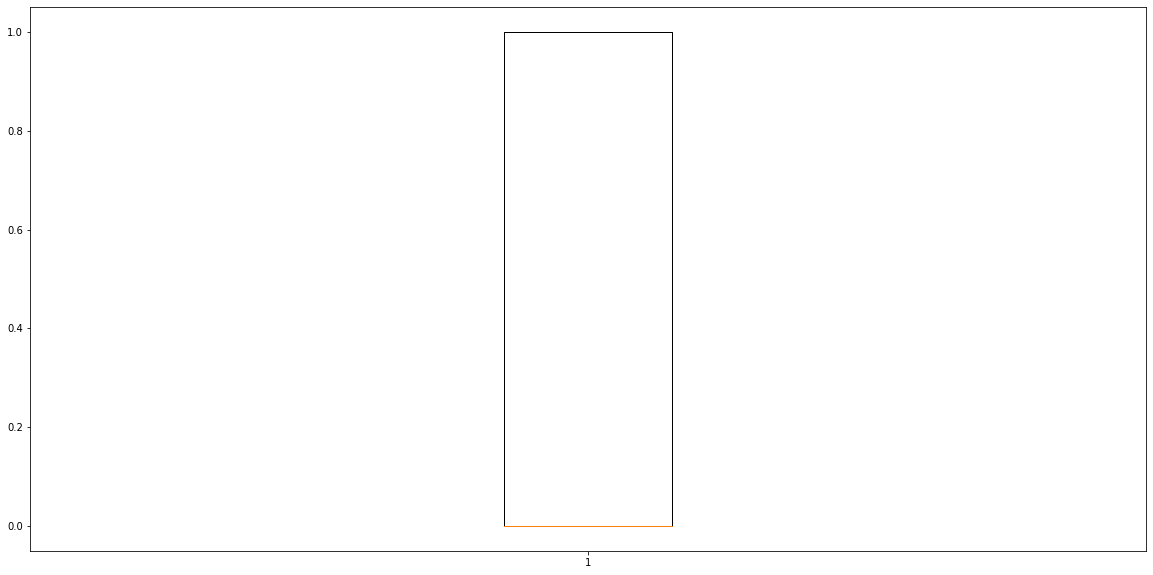

In [1951]:
plt.boxplot(dados['anaemia'])

Sem outliers em dados["anaemia"]

{'boxes': [<matplotlib.lines.Line2D at 0x7f7302a780b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7302a78ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7302a82588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7302a82208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7302a783c8>,
  <matplotlib.lines.Line2D at 0x7f7302a78748>]}

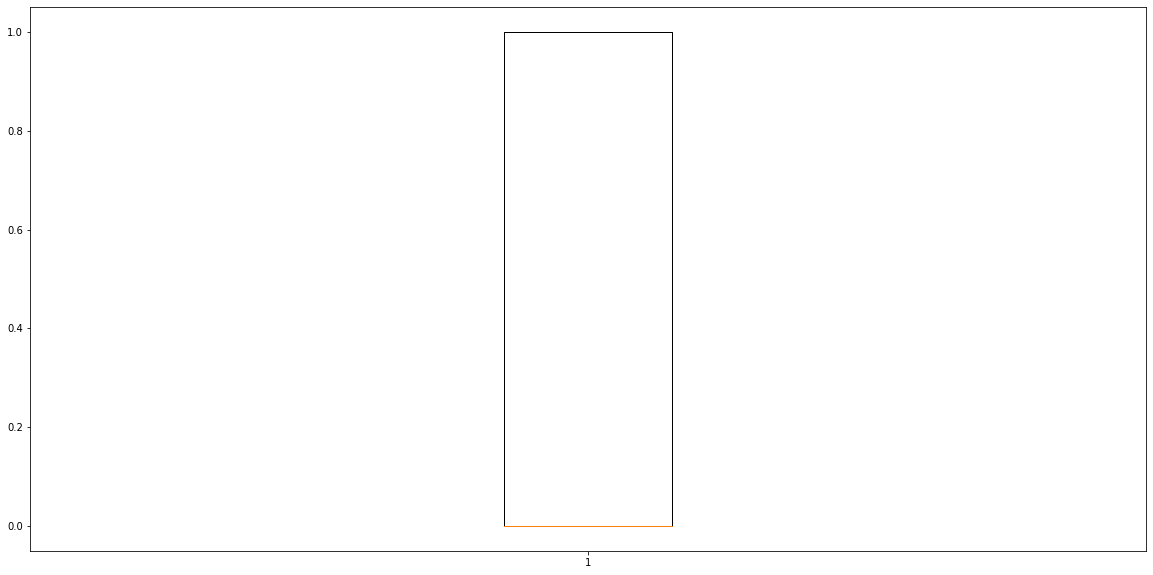

In [1952]:
plt.boxplot(dados['diabetes'])

Sem outliers em dados["diabetes"]

{'boxes': [<matplotlib.lines.Line2D at 0x7f7302a51780>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7302a5f1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7302a5fc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7302a5f8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7302a51a90>,
  <matplotlib.lines.Line2D at 0x7f7302a51e10>]}

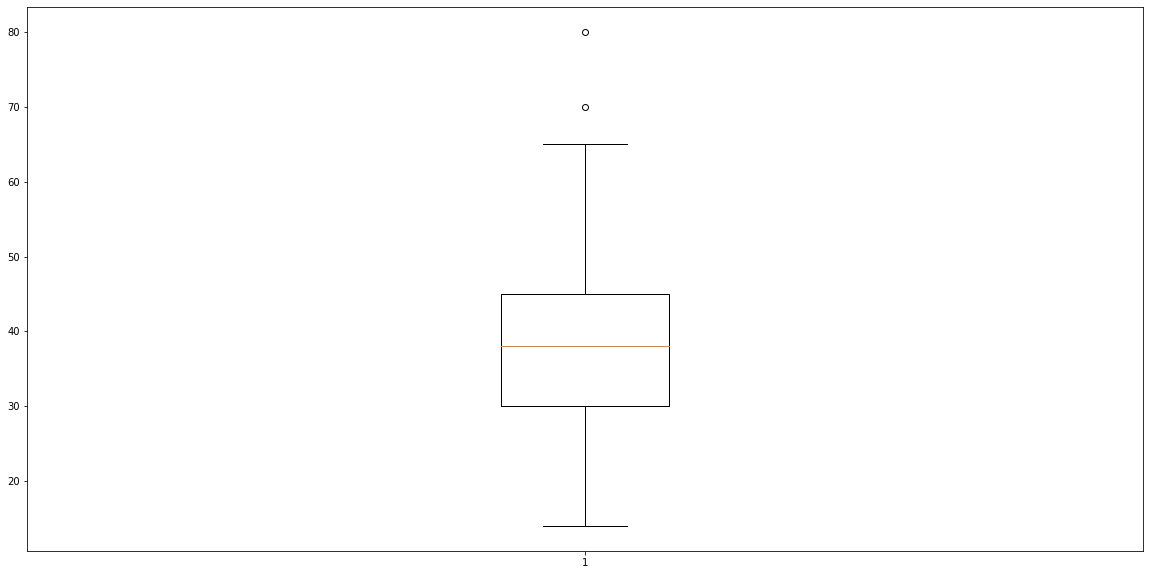

In [1953]:
plt.boxplot(dados['ejection_fraction'])

Dois valores discrepantes quando "ejection_fraction" é maior ou maior que 70%.




In [1954]:
dados[dados['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [1955]:
#Valores > 70% são removidos
dados=dados[dados['ejection_fraction']<70]

In [1956]:
dados['age']=dados['age'].astype('int64')
dados['anaemia'].value_counts(normalize=True)*100
dados['diabetes'].value_counts(normalize=True)*100
dados['high_blood_pressure'].value_counts(normalize=True)*100
dados['sex'].value_counts(normalize=True)*100
dados['smoking'].value_counts(normalize=True)*100
dados['DEATH_EVENT'].value_counts(normalize=True)*100

0    68.013468
1    31.986532
Name: DEATH_EVENT, dtype: float64

In [1957]:


X = dados.iloc[:,[0,4,7,11]]
y = dados.DEATH_EVENT

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

rparams={
    'max_leaf_nodes':[2,3,4,5,6,7],
    'criterion':['entropy','gini'],
    'max_depth':['None',2,3,4,5,6],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,4,5,5,6],
    'max_features':['None','auto','log2','sqrt']
}

d=DecisionTreeClassifier(random_state=0)
classificador=RandomizedSearchCV(d,param_distributions=rparams,cv=10,n_jobs=-1,scoring='roc_auc',random_state=0)
classificador.fit(X_train,y_train)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
            

In [1958]:
classificacao = classificador.predict(X_test)
print(classification_report(y_test,classificacao))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.84      0.94      0.89        17

    accuracy                           0.93        60
   macro avg       0.91      0.94      0.92        60
weighted avg       0.94      0.93      0.93        60



In [1959]:

fpr, tpr, _ = roc_curve(y_test,classificacao)
print("fpr " + str(fpr) +" tpr: " + str(tpr))

fpr [0.         0.06976744 1.        ] tpr: [0.         0.94117647 1.        ]


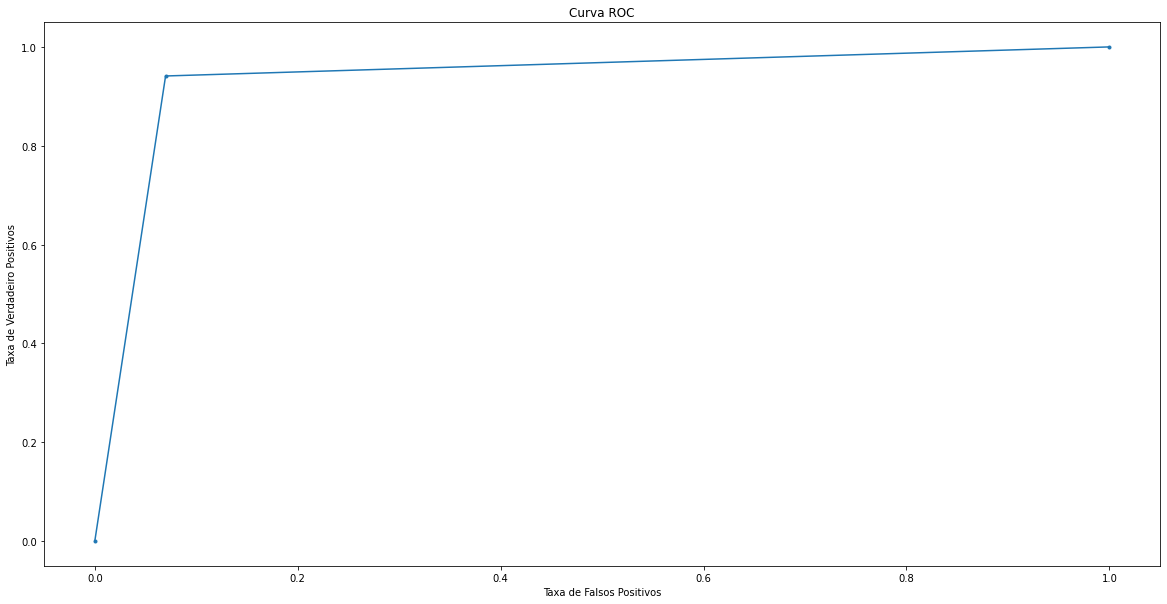

In [1960]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [1961]:
erro = roc_auc_score(y_test,classificacao)
erro

0.935704514363885

In [1962]:
kf = KFold(n_splits=5)

In [1963]:
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296] 
Teste: [ 0  1  2  3  4  5  6

In [1964]:
classificador = DecisionTreeClassifier()

In [1965]:
scores = cross_val_score(classificador,X,y,cv=10)
print(scores)
print(scores.mean(),scores.std())

[0.36666667 0.7        0.9        0.86666667 0.43333333 0.83333333
 0.7        0.65517241 0.75862069 0.68965517]
0.6903448275862069 0.16504498399919648


**Comparando Árvore de Decisão com Random Forest**

In [1966]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1967]:
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1968]:
arvore.score(X_test,y_test)

0.85

In [1969]:
floresta.score(X_train,y_train)

1.0

In [1970]:
clf_arvore = arvore.predict(X_test)

In [1971]:
clf_floresta = floresta.predict(X_test)

In [1972]:
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)

In [1973]:
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta)

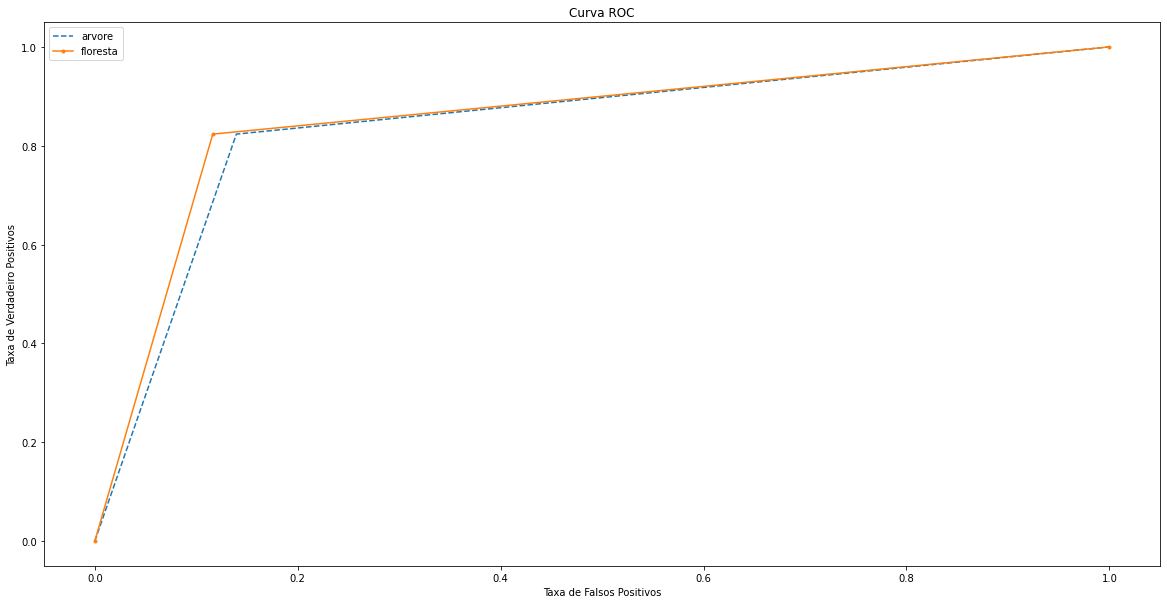

In [1974]:
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [1975]:
arvore = DecisionTreeClassifier()

scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.687, 0.162)

In [1976]:
floresta = RandomForestClassifier()

scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.734, 0.141)